In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# importing SKLEARN lib
from sklearn.linear_model import LinearRegression

In [3]:
# importing matrix needed to determine the fitness of model
from sklearn.metrics import r2_score

In [4]:
import statsmodels.formula.api as smf

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Rsq = coefficient of determination  = 1- (error by LR/error by naive bayes) = 1- (sum of sq of residual/total sum of sq)

### Step 1.  Identify the Linear relationship between them by
    * Scatter Plot
    * coefficient of corelation

In [6]:
df = pd.read_csv('wc-at.csv')

In [7]:
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [9]:
df.isna().sum()

Waist    0
AT       0
dtype: int64

In [ ]:
# no missing values are present
# Data Types are correct

<AxesSubplot:xlabel='Waist'>

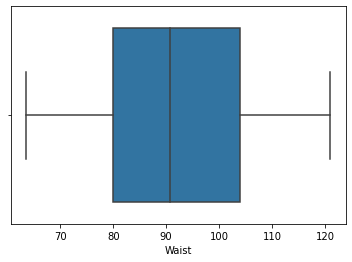

In [12]:
sns.boxplot(df['Waist'])

<AxesSubplot:xlabel='AT'>

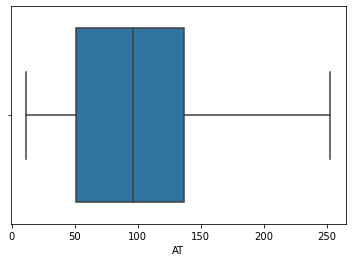

In [13]:
sns.boxplot(df['AT'])

In [ ]:
# from above box plot we can see there is no outliers present in the data
#they waist is fairly normally distributed compared to AT

Text(0.5, 1.0, 'Predicting AT from Waist')

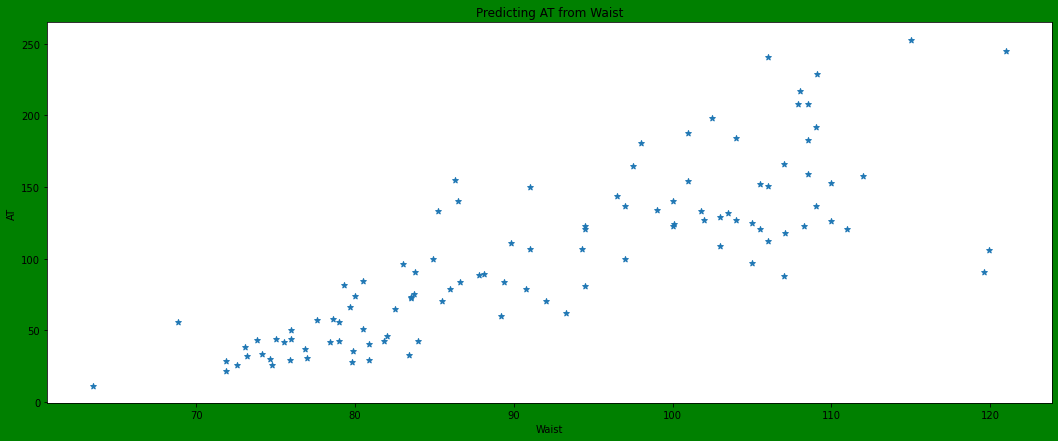

In [14]:
# Scatter Plot   Waist vs AT

plt.figure(figsize=(18,7),facecolor='g')
plt.scatter(df['Waist'],df['AT'],marker="*")
plt.xlabel('Waist')
plt.ylabel('AT')
plt.title('Predicting AT from Waist') 

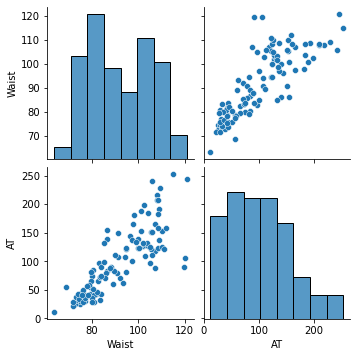

In [15]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
# there is strong +ve corelation between WC vs AT

In [16]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [ ]:
# r = coefficient of corelation = 0.818558 
### Waist & AT follows strong positive corelation as r>0.8

<AxesSubplot:>

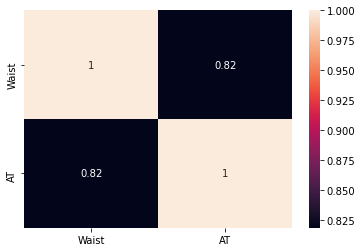

In [18]:
# run this next time
corrMatrix = df.corr()
sns.heatmap(corrMatrix,annot = True)


### Step 2. Creating Linear Model 
    * SKLEARN Lib
    * Statsmodels Lib

#### SKLEARN Lib

In [ ]:
# sklearn lib specific format
# specific format - list of each items in a list == [[],[],[],[]]   otherwise just[]  #ARRAY 2D FORMAT

In [19]:
lr = LinearRegression()

In [20]:
df.shape

(109, 2)

In [21]:
# Numpy matrics -> by values Method & reshape -> changed shape 
x = df['Waist'].values.reshape(109,1)
y = df['AT'].values.reshape(109,1)

In [22]:
# to visualize the specific format - created x array with 109 rows & 1 columns
x

array([[ 74.75],
       [ 72.6 ],
       [ 81.8 ],
       [ 83.95],
       [ 74.65],
       [ 71.85],
       [ 80.9 ],
       [ 83.4 ],
       [ 63.5 ],
       [ 73.2 ],
       [ 71.9 ],
       [ 75.  ],
       [ 73.1 ],
       [ 79.  ],
       [ 77.  ],
       [ 68.85],
       [ 75.95],
       [ 74.15],
       [ 73.8 ],
       [ 75.9 ],
       [ 76.85],
       [ 80.9 ],
       [ 79.9 ],
       [ 89.2 ],
       [ 82.  ],
       [ 92.  ],
       [ 86.6 ],
       [ 80.5 ],
       [ 86.  ],
       [ 82.5 ],
       [ 83.5 ],
       [ 88.1 ],
       [ 90.8 ],
       [ 89.4 ],
       [102.  ],
       [ 94.5 ],
       [ 91.  ],
       [103.  ],
       [ 80.  ],
       [ 79.  ],
       [ 83.5 ],
       [ 76.  ],
       [ 80.5 ],
       [ 86.5 ],
       [ 83.  ],
       [107.1 ],
       [ 94.3 ],
       [ 94.5 ],
       [ 79.7 ],
       [ 79.3 ],
       [ 89.8 ],
       [ 83.8 ],
       [ 85.2 ],
       [ 75.5 ],
       [ 78.4 ],
       [ 78.6 ],
       [ 87.8 ],
       [ 86.3 ],
       [ 85.5 

In [23]:
# fiting x,y to create the Simple Linear Model
reg_model = lr.fit(x,y)

In [24]:
print(f'Coefficient of Regression Line: {reg_model.coef_}')
print(f'Intercept of Regression Line: {reg_model.intercept_}')

Coefficient of Regression Line: [[3.45885939]]
Intercept of Regression Line: [-215.98148796]


In [25]:
# lets find out the predicted AT 

reg_model.predict(x)

array([[ 42.56825159],
       [ 35.1317039 ],
       [ 66.95321031],
       [ 74.389758  ],
       [ 42.22236565],
       [ 32.53755936],
       [ 63.84023685],
       [ 72.48738533],
       [  3.65608343],
       [ 37.20701954],
       [ 32.71050233],
       [ 43.43296644],
       [ 36.8611336 ],
       [ 57.26840401],
       [ 50.35068522],
       [ 22.16098118],
       [ 46.71888286],
       [ 40.49293596],
       [ 39.28233517],
       [ 46.54593989],
       [ 49.83185632],
       [ 63.84023685],
       [ 60.38137746],
       [ 92.54876981],
       [ 67.64498219],
       [102.23357611],
       [ 83.55573539],
       [ 62.4566931 ],
       [ 81.48041975],
       [ 69.37441188],
       [ 72.83327127],
       [ 88.74402448],
       [ 98.08294484],
       [ 93.24054169],
       [136.82217003],
       [110.88072459],
       [ 98.77471671],
       [140.28102942],
       [ 60.7272634 ],
       [ 57.26840401],
       [ 72.83327127],
       [ 46.89182583],
       [ 62.4566931 ],
       [ 83

In [ ]:
# predicted y(AT) values from given x(Waist) values
# y & Predicted y difference is vertical dist at which x is same
# from collection of data we know x from which we put y^n=mxn+c likewise
# new line coordinate x = same, y = predicted y
# plot scatter from these points

Text(0.5, 1.0, 'Predicting AT from Waist')

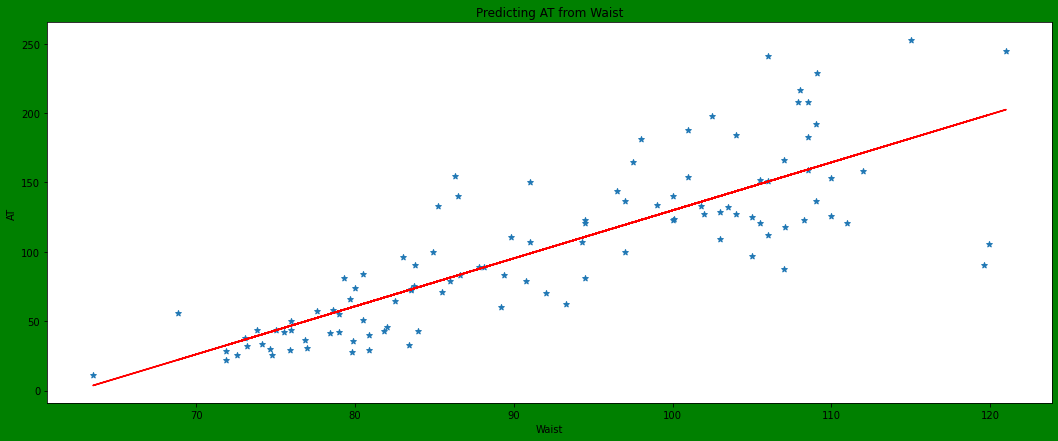

In [26]:
# lets Plot Scatter Plot with Regression Line  - with the help of y=mx+c

plt.figure(figsize=(18,7),facecolor='g')
plt.scatter(df['Waist'],df['AT'],marker="*")

plt.plot(df['Waist'],reg_model.coef_[0]*df['Waist']+reg_model.intercept_,color='r') #(x,y=mx+c)

plt.xlabel('Waist')
plt.ylabel('AT')
plt.title('Predicting AT from Waist')

Text(0.5, 1.0, 'Predicting AT from Waist')

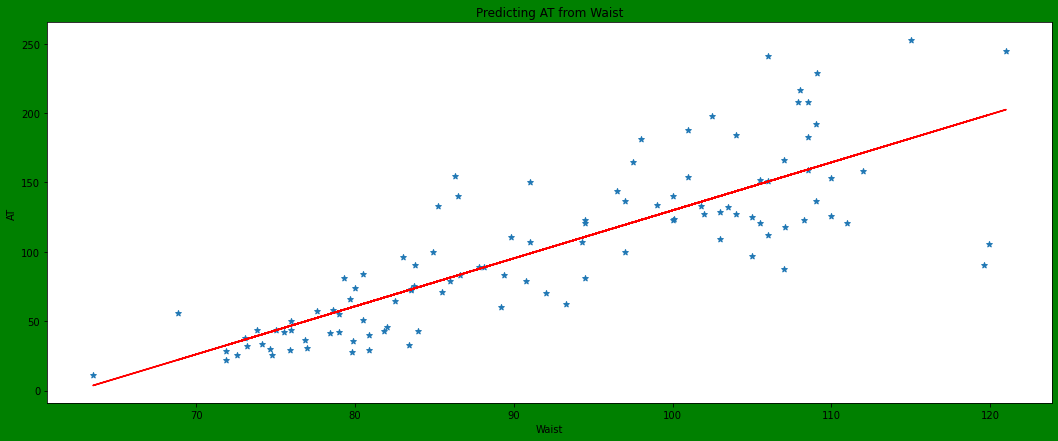

In [27]:
# lets Plot Scatter Plot with Regression Line - with help of (x,predicted y)

plt.figure(figsize=(18,7),facecolor='g')
plt.scatter(df['Waist'],df['AT'],marker="*")

plt.plot(df['Waist'],reg_model.predict(x),color='r') #(x,y^)

plt.xlabel('Waist')
plt.ylabel('AT')
plt.title('Predicting AT from Waist')

In [46]:
reg_model.resid

AttributeError: 'LinearRegression' object has no attribute 'resid'

### Step 3 - Model Validation - How Good Model is?

In [ ]:
# find the R**2 value - for Good ~ 1, for bad ~0 , 0 <= R^2 <= 1

In [28]:
# r2 score is calculated based on sum of diff (actual-predicted) square
#r2_score(yi - yi^)  #( actual y - predicted y)

r2 = r2_score(df['AT'],reg_model.predict(x))
r2

0.6700368930528429

In [ ]:
### r**2 score is not good enough
### improve r**2 
### r**2 >0.8 is said to be good

### Step 2 : Creating Linear Model by Statsmodels

In [29]:
#OLS(Y~X)  - No need to reshape the data
# OLS - ordinary Least Squared - it is one of the method for fitting the line = sum of (y-y^)**2

smf_rgmodel = smf.ols('AT~Waist',data=df).fit()

In [30]:
smf_rgmodel.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [31]:
predicted_AT = smf_rgmodel.predict(df['Waist'])
predicted_AT

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [32]:
smf_rgmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.62e-27
Time:                        16:15:35   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# again check r2 score - though we have got in above summary

In [33]:
s_r2 = r2_score(df['AT'],smf_rgmodel.predict(df['Waist']))
s_r2

0.6700368930528429

In [ ]:
### while ploting regression line use ( y= predicted y)

In [34]:
print('R Score is -',smf_rgmodel.rsquared)

R Score is - 0.670036893052843


In [35]:
print(f'Adj R Score is -{smf_rgmodel.rsquared_adj}')

Adj R Score is -0.6669531256981966


In [47]:
new_model.resid

0     -0.502620
1     -0.409489
2     -0.281814
3     -0.363673
4     -0.350014
         ...   
104    0.049994
105   -0.366216
106    0.051632
107    0.253281
108    0.229130
Length: 109, dtype: float64

#### How to Improve the R^2 

In [36]:
new_model = smf.ols('np.log(AT)~Waist',data=df).fit()

In [37]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.68e-30
Time:                        16:17:38   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
df['Waist_sq']=df['Waist']**2

new_model2 = smf.ols('np.log(AT)~Waist+Waist_sq',data=df).fit()

In [39]:
new_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.80e-35
Time:                        16:17:41   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# how to find when 2 values entered
new_model2.predict([df['Waist'],df['Waist_sq']])

Text(0.5, 1.0, 'Predicting AT from Waist')

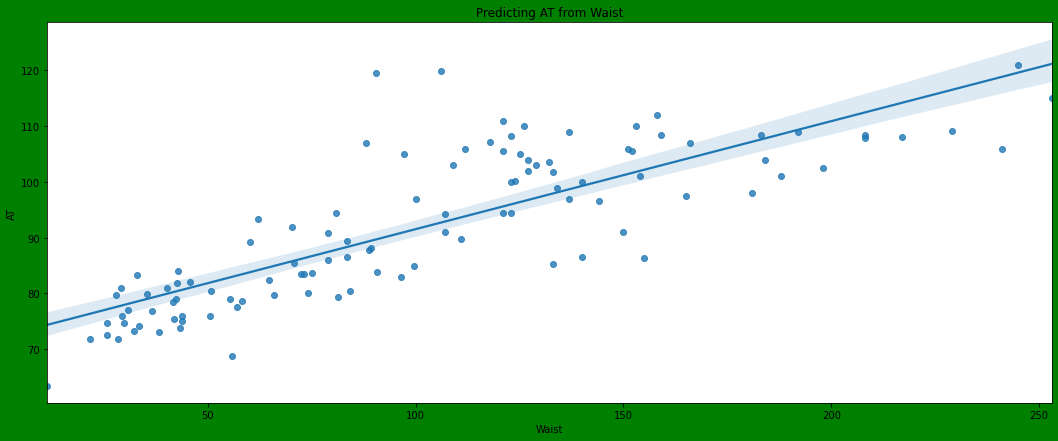

In [41]:
plt.figure(figsize=(18,7),facecolor='g')

sns.regplot('AT','Waist',data=df,fit_reg=True)

plt.xlabel('Waist')
plt.ylabel('AT')
plt.title('Predicting AT from Waist')


Text(0.5, 1.0, 'Predicting AT from Waist')

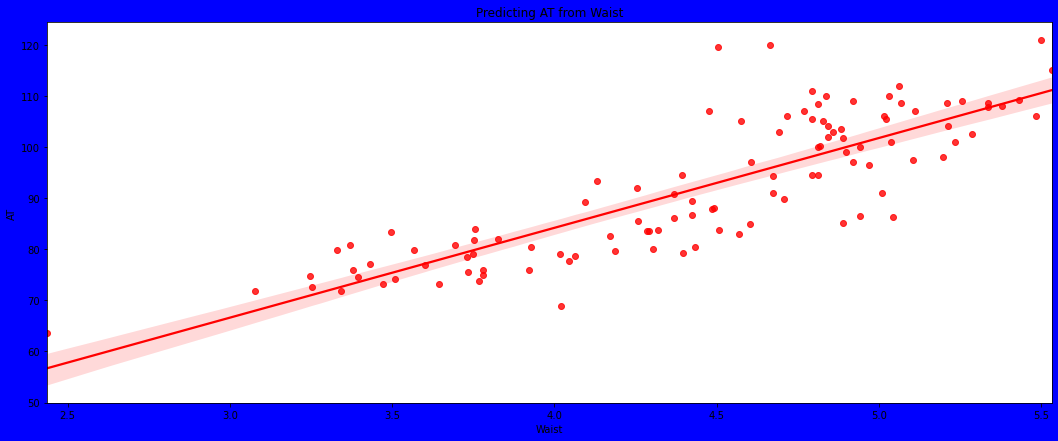

In [45]:
plt.figure(figsize=(18,7),facecolor='b')

sns.regplot(np.log(df.AT),df.Waist,fit_reg=True,color='r')

plt.xlabel('Waist')
plt.ylabel('AT')
plt.title('Predicting AT from Waist')